In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()
# We wanted to see the top 5 rows of our dataset that's why we used df.head(), if we wanted to see the last 5 rows of the dataset we would have used df.tail()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [ ]:
df.shape
# To check number of rows and columns in the dataset we have 

(847, 2)

In [ ]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")
# To find out the date range available in our dataset

Date range of gold prices available from - 1950-01 to 2020-07


In [ ]:
date = pd.date_range (start = '1/1/1950', end='8/1/2020', freq = 'M' )
date
# To find the Date & time index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [ ]:
df['month'] = date 
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()
# To see the month instead of the date for a particular price- (see date price table above)

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


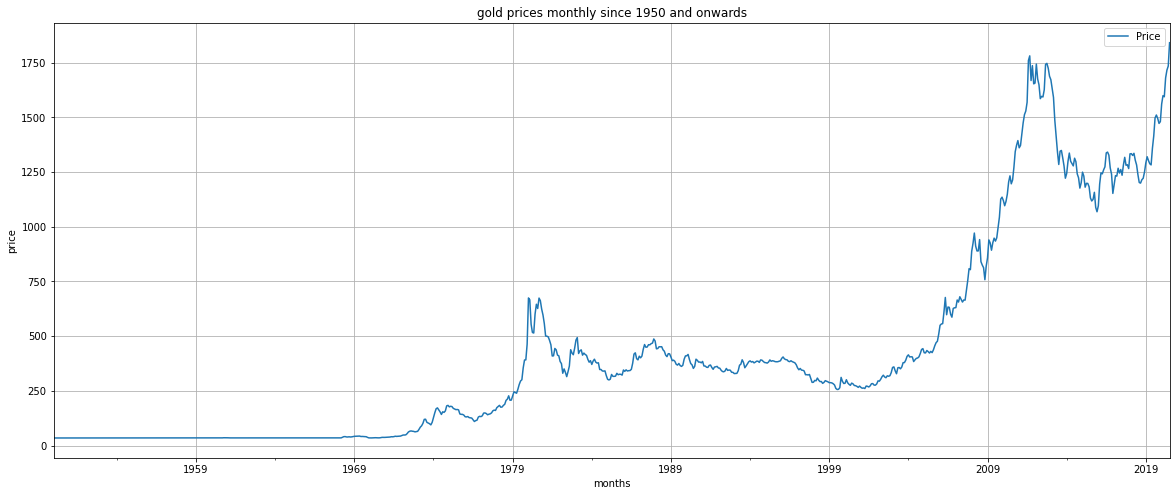

In [ ]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid();

In [ ]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


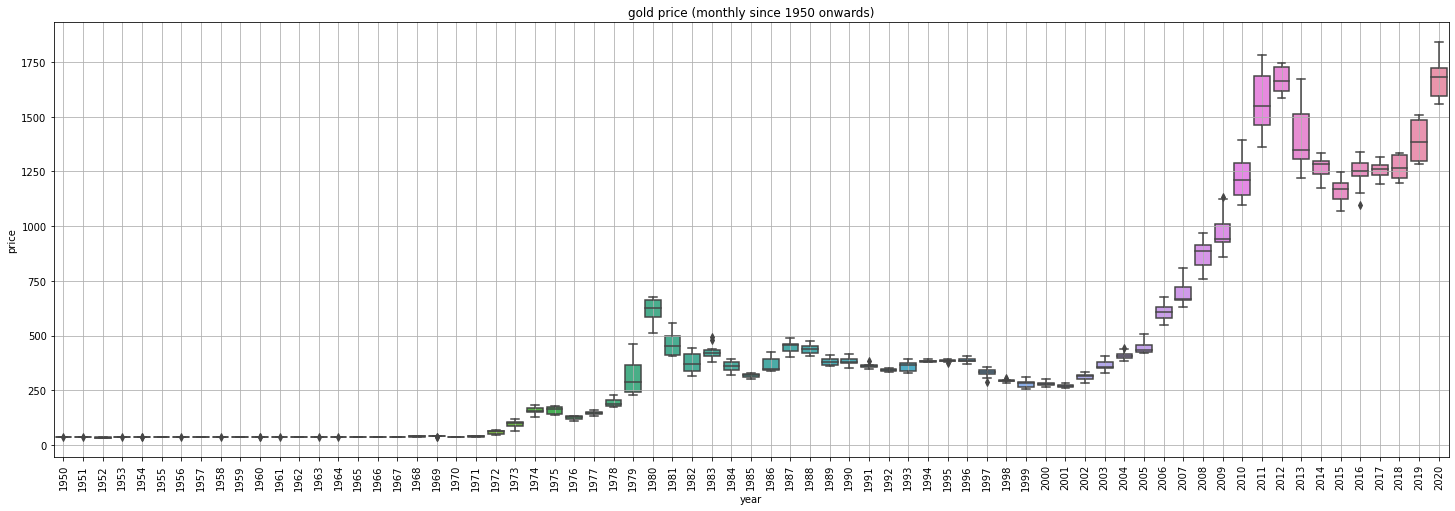

In [ ]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title('gold price (monthly since 1950 onwards)')
plt.xlabel("year")
plt.ylabel("price")
plt.xticks(rotation = 90)
plt.grid();
# same graph as above, just a different kind - we are creating different kinds of graphs because we are doing Exploratory Data Analysis (EDA)

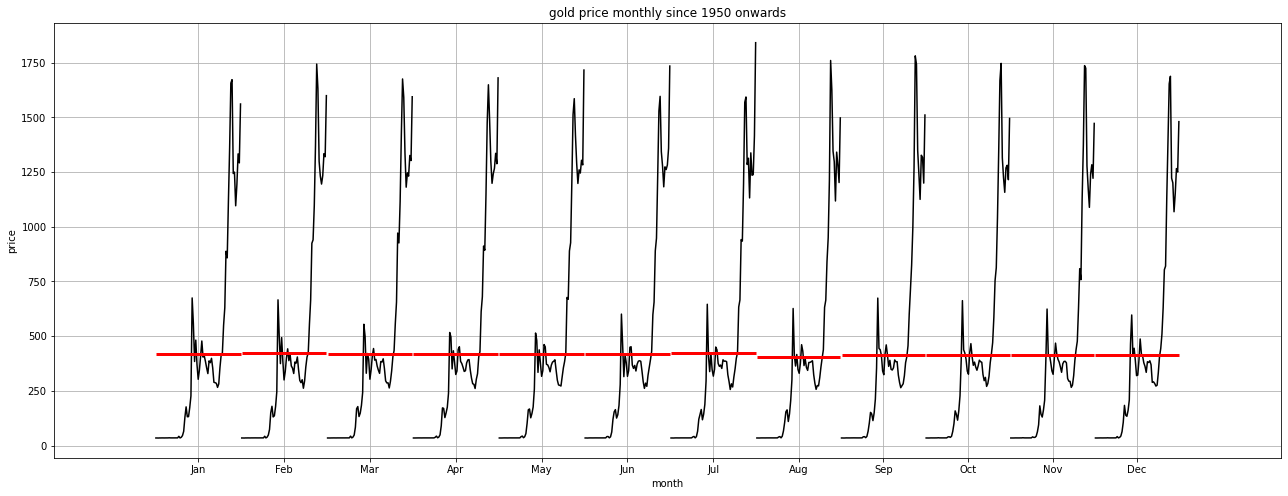

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel = 'gold price', ax = ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();
# same graph as above, just a different kind - we are creating different kinds of graphs because we are doing Exploratory Data Analysis (EDA)

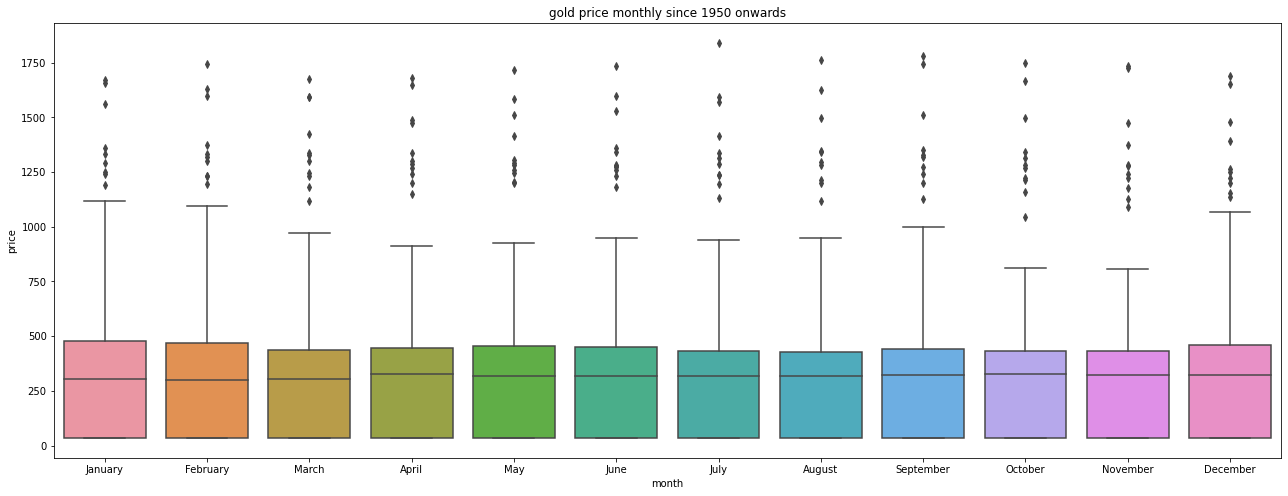

In [ ]:
_, ax = plt.subplots(figsize =(22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax = ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel("month")
plt.ylabel("price")
plt.show();
# same graph as above, just a different kind - we are creating different kinds of graphs because we are doing Exploratory Data Analysis (EDA)
# we can write both plt.grid and plt.show to visualize

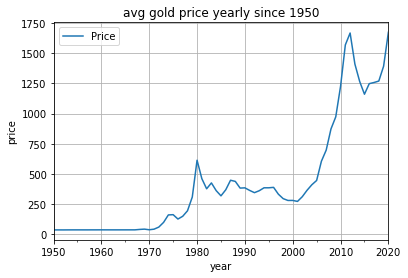

In [ ]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel("year")
plt.ylabel("price")
plt.grid();
# same graph as above, just a different kind - we are creating different kinds of graphs because we are doing Exploratory Data Analysis (EDA)
# we can write both plt.grid and plt.show to visualize


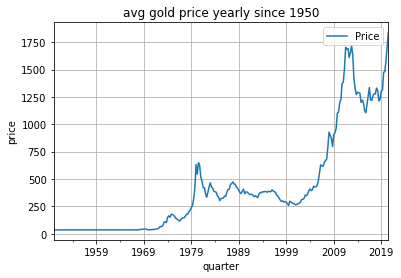

In [ ]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel("quarter")
plt.ylabel("price")
plt.grid();
# same graph as above, just a different kind - we are creating different kinds of graphs because we are doing Exploratory Data Analysis (EDA)
# we can write both plt.grid and plt.show to visualize


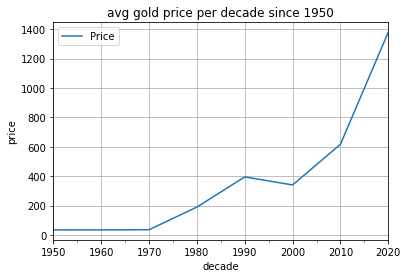

In [ ]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("avg gold price per decade since 1950")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid();


In [ ]:
# Analysis in Coefficient of Variation to find out risk involved and if an investor should go ahead and invest in gold)
# Let us look at the CV (CV = Coefficient of Variation in prices) value of each year in gold prices
df_1 = df.groupby(df.index.year).mean().rename(columns= {"Price":"Mean"})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns= {'Price':'Std'}), left_index= True, right_index= True)
df_1['Cov_pct']= ((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()
# round(2) suggests we wnat to see upto two decimal places

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


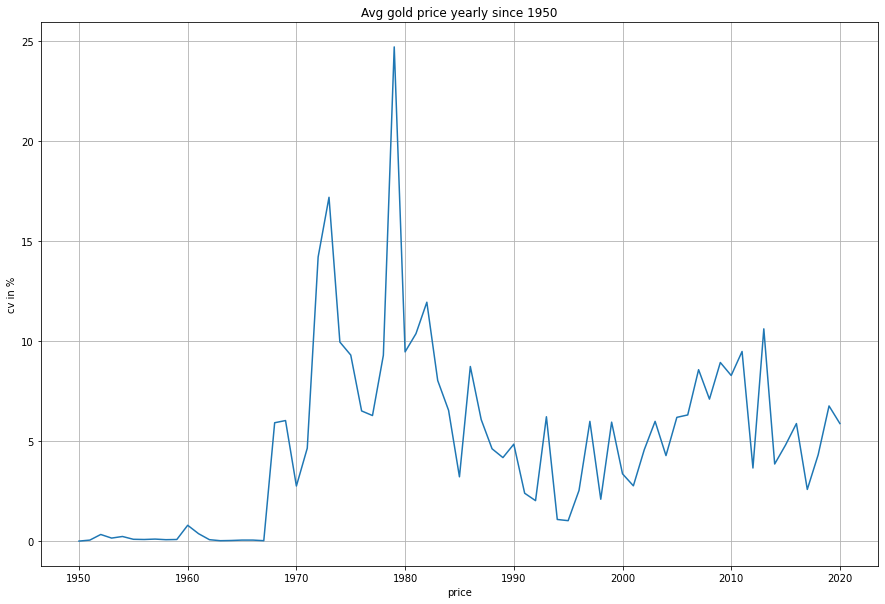

In [ ]:
fig, ax= plt.subplots(figsize= (15,10))
df_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950") 
plt.xlabel("price")
plt.ylabel("cv in %")
plt.grid();
# we can see below that CV value reached highest in 1978 

In [ ]:
# TIME SERIES MODELLING:-
# For training, we are taking data till 2025
train = df[df.index.year <= 2015 ]
# For testing, we are taking data from 2015 to 2020
test = df[df.index.year > 2015 ]


In [ ]:
# To find out how many rows and columns are presentin train and test - which gives 792 rows and 1 column in training and 55 rows and 1 column in testing
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


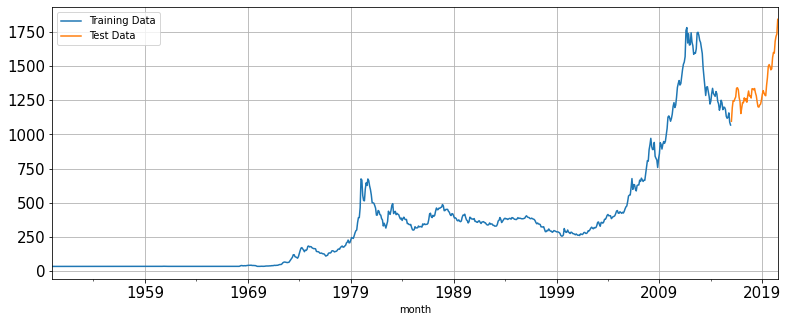

In [ ]:
train["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()
# Here legend are blue and orange lines

In [ ]:
# We are going to do two types of modeling - 1) Linear Regression & 2) Naive Bayes

In [ ]:
# Linear Regression:-
train_time = [i + 1 for i in range(len (train))]
test_time = [i+len(train)+1 for i in range(len (test))]
len(train_time), len(test_time)
# Here we get 792 rows in training and 55 rows in testing

(792, 55)

In [ ]:
# LR = Linear Regression
LR_train = train.copy()
LR_test = test.copy()

In [ ]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [ ]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

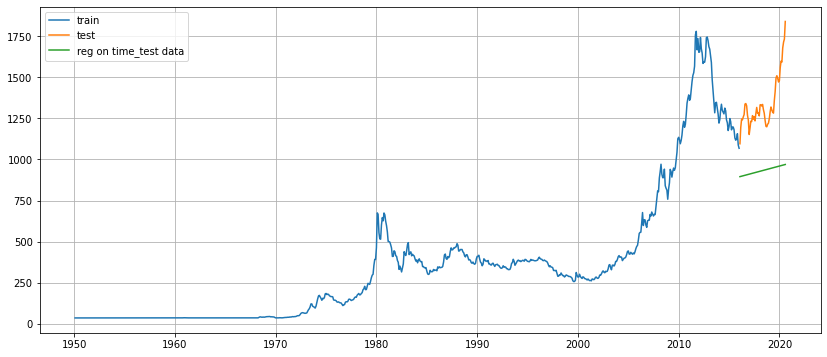

In [ ]:
test_prediction_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();
# Regression line can be seen in green color

In [ ]:
# We will find out MAPE now - it is the measure of forecasting accuracy in a statistical model
def mape(actual, pred):
    return round ((np.mean(abs(actual - pred)/ actual))*100, 2)

In [ ]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test), "%")


MAPE is 29.760 %


In [ ]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index= ["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [ ]:
# Now we will do final modeling
final_model = ExponentialSmoothing(df,
                                 trend = 'additive',
                                 seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

In [ ]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [ ]:
predictions = final_model.forecast(steps=len(test))

In [ ]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction': predictions,
                        'upper_CI': predictions+ 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()


,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


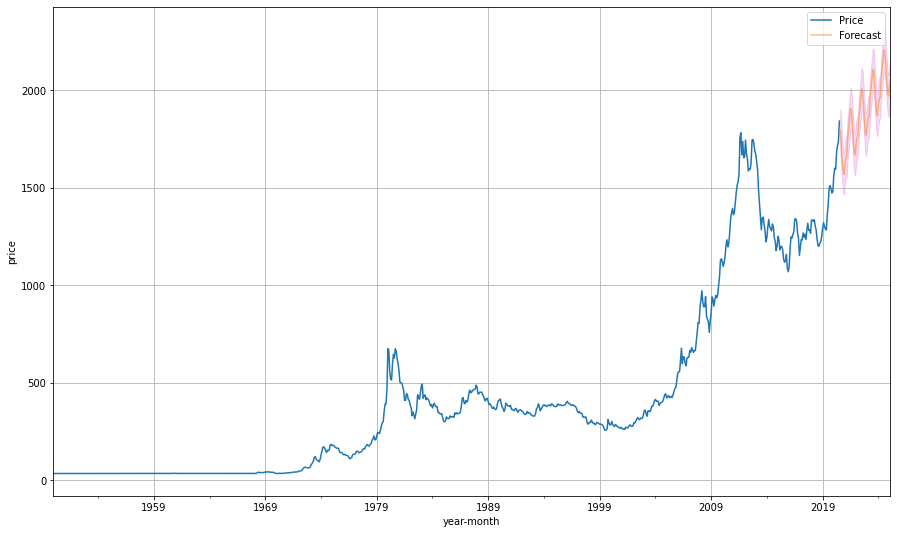

In [ ]:
# Now at the final stage- we will plot the prediction/forecast graph
axis = df.plot(label = 'Actual', figsize=(15,9))
pred_df['prediction'].plot(ax= axis, label= 'Forecast', alpha= 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha= .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [ ]:
# Forecast graph can be seen above. MAPE is 17.24 here.
# Note: The lower the MAPE, the better the prediction accuracy is and the better our model is.

